# Data loading / Preprocessing

In [1]:
import numpy as np

#Defining a rng with seed 2026 to ensure consistency across runs 
rng = np.random.default_rng(seed=2026)

In [2]:
import pandas as pd

spam_df = pd.read_csv('spambase.data', header=None)
# without the header=None flag, the first row ended up being the column names

In [3]:
print(f"Spam Data Preview: \n")
spam_df.head()

Spam Data Preview: 



,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


We still need the column names, which we can get from the file spambase.names.

In [4]:
# get a list with each line in the file
with open('spambase.names', 'r') as file:
    file_lines = file.readlines()

In [5]:
# the column names start at line 34
col_name_lines = file_lines[33:]
# for col_name in col_names: print(col_name) #- > this confirms that we are starting at the correct line

We also need to cut off everything after the colon in each line. 

In [6]:
col_names = [col_name_line.split(':')[0] for col_name_line in col_name_lines]
# for col_name in col_names: print(col_name) # -> this confirms the success of the parsing

In [7]:
print(f"Number of columns in dataset: {spam_df.shape[1]}")
print(f"Number of column names acquired: {len(col_names)}")

Number of columns in dataset: 58
Number of column names acquired: 57


We are missing the final column, which is the label column (1 for spam, 0 for not spam). 

In [8]:
col_names.append("is_spam")

In [9]:
# Now, assign the column names
spam_df.columns = col_names

In [10]:
print(f"Spam Data Preview: \n")
spam_df.head()

Spam Data Preview: 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
print(f"Dimensions of dataset: {spam_df.shape}")

Dimensions of dataset: (4601, 58)


Before going any further, we want to make sure our data is clean and won't cause issues

In [12]:
# Check if there are missing values in each column of our spam_df
print("Missing values per column:")
print(spam_df.isnull().sum())

# Total count of missing values in the dataframe
print(f"\nTotal number of missing values: {spam_df.isnull().sum().sum()}")

Missing values per column:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_tel

In [13]:
# Ensure all feature columns are numeric (ints/floats)
print(f"Column types in spam_df:\n{spam_df.dtypes.value_counts()}")

Column types in spam_df:
float64    55
int64       3
Name: count, dtype: int64


We see here that we indeed have 57 continuous features and 1 binary classifier. Now, we split the data into a test and train set.

In [14]:
# Get the row indices of the dataframe 
samples = spam_df.index.tolist()   

# shuffle using the rng we defined with seed 2026
rng = np.random.default_rng(seed=2026)
rng.shuffle(samples)

# divide this with a 5% / 95% split
train_ind = samples[:round(len(samples)*0.05)]
test_ind = samples[round(len(samples)*0.05):]

print(f"Number of training samples: {len(train_ind)}")
print(f"Number of testings samples: {len(test_ind)}")

Number of training samples: 230
Number of testings samples: 4371


In [15]:
# split the dataset

# inputs only
X = spam_df.iloc[:, :-1]

# outputs only
y = spam_df["is_spam"]

# train-test split
X_train = X.iloc[train_ind]
X_test = X.iloc[test_ind]

y_train = y.iloc[train_ind]
y_test = y.iloc[test_ind]

Here, we want to check the label distribution in our entire dataset and the training set to ensure the training set isn't too skewed, potentially introducing bias into our model

In [16]:
label_dist_spam_df = spam_df["is_spam"].value_counts(normalize=True)
label_dist_y_train = y_train.value_counts(normalize=True)
print(f"Label distribution in total dataset: \n{label_dist_spam_df}")
print(f"Label distribution in Training Set: \n{label_dist_y_train}")

Label distribution in total dataset: 
is_spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64
Label distribution in Training Set: 
is_spam
0    0.613043
1    0.386957
Name: proportion, dtype: float64


# Pre-Processing

In [17]:
# Apply standardization

# save a raw copy for cross validation later:
X_train_raw = X_train.values.copy()

# Calculate mean and std from training data only

train_mean = X_train.mean()
train_std = X_train.std()

# Apply the same train_mean and train_std to both training and test sets to prevent data leakage
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

#Convert data to numPy arrays for downstream processing
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


# Task 1
## Preprocessing Methodology:
During data preprocessing, to ensure a representative sample, we first shuffled the dataset using a fixed random seed (2026). We then performed a 5%/95% training-test data split to create a small training set of approximately 230 samples, a scenario designed to highlight the effects of overfitting. To prevent data leakage, we calculated the mean and standard deviation exclusively from the training set and used these parameters to standardize both the training and test features. Finally, we prepended a column of ones to the feature matrices to incorporate the bias term directly into our weight vector calculations.

### Logistic Regression with SGD

We implemented a custom LogisticRegressionSGD class that utilizes Mini-batch Stochastic Gradient Descent for optimization. To handle the intercept, a bias column of ones is prepended to the feature matrix during the fitting process. The weights are updated by computing the gradient of the cross-entropy loss function over randomized mini-batches. To combat overfitting, we integrated $L_2$ regularization into the gradient calculation. Additionally, we implemented numerical clipping within the sigmoid function to ensure stability against overflow, and tracked the cross-entropy loss at each epoch to visualize the model's convergence behavior.

The cost function is included in this class as its own function. 

*Note: We have adopted the convention of using $\lambda \|\mathbf{w}\|^2_2$ for our L2 regularization penalty. 

In [18]:
import numpy as np

class LogisticRegressionSGD:
    def __init__(self, learning_rate, epochs, batch_size, reg_lambda):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.w = None
        self.loss_history = []
        self.acc_history = []

    def sigmoid(self, z):
        # Clip values to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    # the cross entropy loss function is inspired by the code review, but implements 
    # regularization

    def compute_cross_entropy_loss(self, x, y):
        """
        Compute the binary cross-entropy cost (negative log-likelihood).
        
        Parameters:
        x: input features, shape (N, D)
        y: binary labels (0 or 1), shape (N,)
    
        Note: input parameters are a subset of the total dataset (mini-batch)
        
        Returns:
        J: scalar cost value (lower is better)
        """
        N, D = x.shape
        
        # Compute logits: z = x @ w, shape (N,)
        # These are the raw predictions before applying sigmoid
        z = np.dot(x, self.w)
        
        # Binary cross-entropy loss (mean over all samples in mini-batch)
        # np.log1p(x) computes log(1 + x) with better numerical stability
        # For y=1: cost is log(1 + exp(-z)) which penalizes z being too negative
        # For y=0: cost is log(1 + exp(z)) which penalizes z being too positive
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
    
        # now, add regularization penalty 
        J += (self.reg_lambda) * np.sum(self.w[1:]**2) 
        # here, we originally divided by N to use the mean cost, 
        # to keep this consistent with the mean binary 
        # cross-entropy loss implemented in the code review
        # however, we found that this made the regularization 
        # too weak, so have excluded the divide by N term

        
        # we assume w[0] is a bias, so it is excluded here
        
        return J
    
    def predict(self, x):
        # Threshold at 0.5 for binary classification
        return (self.sigmoid(np.dot(x, self.w)) >= 0.5).astype(int)

    def gradient(self, x, y):
        n = x.shape[0]
        yh = self.sigmoid(np.dot(x, self.w))
        grad = np.dot(x.T, (yh - y)) / n
        
        # L2 Regularization Gradient: (2 * lambda * w) 
        # We do not regularize the bias 
        reg_term = (2 * self.reg_lambda * self.w) 
        reg_term[0] = 0 
        grad += reg_term
        return grad

    def fit(self, x, y):
        # Add bias column here (vector of 1s)
        n_samples = x.shape[0]
        x_with_bias = np.column_stack([np.ones(n_samples), x])
        
        n_features = x_with_bias.shape[1]
        self.w = np.zeros(n_features)
        self.loss_history = []

        for epoch in range(self.epochs):
            # Shuffle at the start of every epoch
            rng = np.random.default_rng(seed=2026)
            indices = rng.permutation(n_samples)
            x_shuffled = x_with_bias[indices]
            y_shuffled = y[indices]
            
            # Iterate through mini-batches
            for i in range(0, n_samples, self.batch_size):
                xb = x_shuffled[i : i + self.batch_size]
                yb = y_shuffled[i : i + self.batch_size]
                
                grad = self.gradient(xb, yb)
                self.w -= self.learning_rate * grad
            
            # Save loss for the Task 1 training curve
            cross_entropy_loss = self.compute_cross_entropy_loss(x_with_bias, y)
            self.loss_history.append(cross_entropy_loss)
            # Calculate accuracy for this epoch
            preds = self.predict(x_with_bias)
            self.acc_history.append(np.mean(preds == y))
            
        return self

    def predict_prob(self, x):
        # Add bias column for prediction
        x_with_bias = np.column_stack([np.ones(x.shape[0]), x])
        return self.sigmoid(np.dot(x_with_bias, self.w))

Using the logistic regression SGD class we defined, we will conduct some experiments to evaluate the training dynamics of our  model under various optimization configurations. To address the requirements of Task 1, we compare the convergence of the model with and without $L_2$ regularization ($\lambda = 0.001$). Furthermore, we investigate the impact of stochasticity on optimization by varying the mini-batch size ($B \in \{1, 16, 64\}$). By tracking the training cross-entropy loss and accuracy across 200 epochs, we aim to analyze the trade-offs between update frequency, gradient stability, and the smoothing effect of mini-batching versus pure Stochastic Gradient Descent ($B=1$).

In [19]:
learning_rate = 0.1
epochs = 200
fixed_lambda = 0.001

# Mini-batch (B=16), No Regularization
model_minibatch_no_reg_batch_16 = LogisticRegressionSGD(learning_rate, epochs, batch_size=16, reg_lambda=0)
model_minibatch_no_reg_batch_16.fit(X_train, y_train)

# Mini-batch (B=16), L2 Regularization
model_minibatch_l2_batch_16 = LogisticRegressionSGD(learning_rate, epochs, batch_size=16, reg_lambda=fixed_lambda)
model_minibatch_l2_batch_16.fit(X_train, y_train)

# Mini-batch (B=64), No Regularization
model_minibatch_no_reg_batch_64 = LogisticRegressionSGD(learning_rate, epochs, batch_size=64, reg_lambda=0)
model_minibatch_no_reg_batch_64.fit(X_train, y_train)

# Mini-batch (B=64), L2 Regularization
model_minibatch_l2_batch_64 = LogisticRegressionSGD(learning_rate, epochs, batch_size=64, reg_lambda=fixed_lambda)
model_minibatch_l2_batch_64.fit(X_train, y_train)

# Pure SGD (B=1), No Regularization
model_sgd_pure = LogisticRegressionSGD(learning_rate, epochs, batch_size=1, reg_lambda=0)
model_sgd_pure.fit(X_train, y_train)


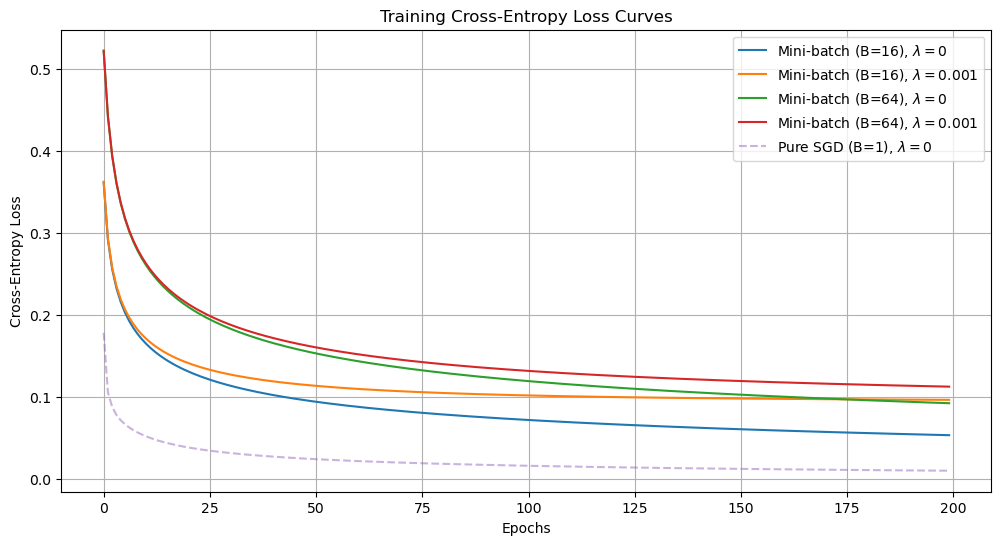

In [20]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(model_minibatch_no_reg_batch_16.loss_history, label=r'Mini-batch (B=16), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_16.loss_history, label=fr'Mini-batch (B=16), $\lambda={fixed_lambda}$')
plt.plot(model_minibatch_no_reg_batch_64.loss_history, label=r'Mini-batch (B=64), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_64.loss_history, label=fr'Mini-batch (B=64), $\lambda={fixed_lambda}$')
plt.plot(model_sgd_pure.loss_history, label=r'Pure SGD (B=1), $\lambda=0$', alpha=0.5, linestyle='--')

plt.title('Training Cross-Entropy Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()

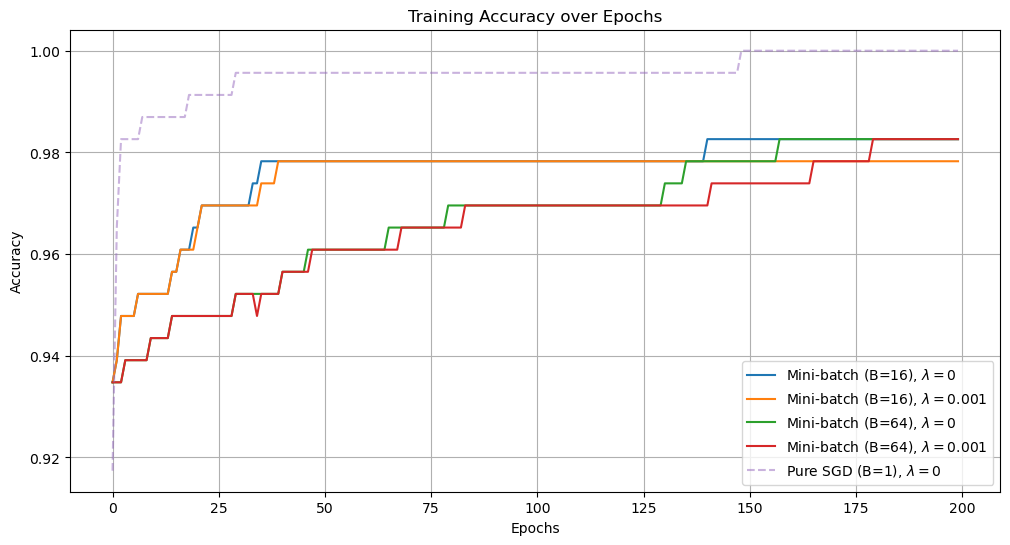

In [21]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(model_minibatch_no_reg_batch_16.acc_history, label=r'Mini-batch (B=16), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_16.acc_history, label=fr'Mini-batch (B=16), $\lambda={fixed_lambda}$')
plt.plot(model_minibatch_no_reg_batch_64.acc_history, label=r'Mini-batch (B=64), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_64.acc_history, label=fr'Mini-batch (B=64), $\lambda={fixed_lambda}$')
plt.plot(model_sgd_pure.acc_history, label=r'Pure SGD (B=1), $\lambda=0$', alpha=0.5, linestyle='--')

plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Discussion on Stability and Optimization 

Stability: As seen on our graph for training loss curves, the training cross-entropy loss decreases rapidly within the first ~25 epochs and eventually plateaus. Given that all graphs plateau in both the loss and accuracy plots, this suggests that our learning rate parameter is well tuned.  

Differences between SGD ($B=1$) and Mini-batch: Pure SGD ($B=1$) shows the highest level of instability. The Pure SDG accuracy plot shows more increases and decreases compared to the Mini-batch plots. This is because each update is based on a single sample, which may be an outlier or otherwise noisy, causing the weights to oscillate. With Mini-batch, the curves are smoother. By averaging the gradient over multiple samples, the noise of individual observations is cancelled out, providing a more stable estimate of the true gradient. While larger batches ($B=64$) offer even more stability, they perform fewer weight updates per epoch, which can sometimes lead to slightly slower initial convergence compared to $B=16$, which is observed in both plots. 

Regularization: The inclusion of L2 regularization ($\lambda=0.001$) results in a slightly higher final training loss than the non-regularized version. This is the expected effect of regularization, since we intentionally prevent the model from perfectly fitting the training data to ensure the weights remain small, which should ultimately help the model generalize better. 

# Task 2

In [22]:
rng = np.random.default_rng(2026) 

import pandas as pd

# Define Hyperparameter Grid
learning_rates = [0.01, 0.05, 0.1]
batch_sizes = [16, 32, 64]
epoch_options = [100, 200, 500]
K = 5 # Number of folds

results_list = []

# Create K-fold indices manually
indices = np.arange(len(y_train))
rng.shuffle(indices)
folds = np.array_split(indices, K)

print(f"Starting {K}-fold Cross-Validation...")

for lr in learning_rates:
    for b in batch_sizes:
        for epochs in epoch_options:
            fold_losses = []
            fold_accuracies = []
            
            for i in range(K):
                # Split into train/val for this fold
                val_idx = folds[i]
                train_idx = np.concatenate([folds[j] for j in range(K) if j != i])

                # to prevent data leakage, the mean and std of each fold should be computed 
                # per fold, so here we copy over the raw training data from before

                # basically we don't want the data from the validation fold to influence 
                # the mean/std of the 
                x_cv_train_raw = X_train_raw[train_idx]
                y_cv_train = y_train[train_idx]
                
                x_cv_val_raw = X_train_raw[val_idx]
                y_cv_val = y_train[val_idx]
            
                fold_mean = x_cv_train_raw.mean(axis=0)
                fold_std = x_cv_train_raw.std(axis=0)

                # Scale both folds using the TRAIN fold's parameters
                x_cv_train = (x_cv_train_raw - fold_mean) / fold_std
                x_cv_val= (x_cv_val_raw - fold_mean) / fold_std
                
                # Initialize and train model (using fixed lambda)
                model = LogisticRegressionSGD(learning_rate=lr, epochs=epochs, batch_size=b, reg_lambda=0.001)
                model.fit(x_cv_train, y_cv_train)
                
                # We need to add the bias column to validation set for testing
                x_cv_val_wb = np.column_stack([np.ones(len(x_cv_val)), x_cv_val])
                loss = model.compute_cross_entropy_loss(x_cv_val_wb, y_cv_val)
                preds = (model.sigmoid(np.dot(x_cv_val_wb, model.w)) >= 0.5).astype(int)
                acc = np.mean(preds == y_cv_val)
                
                fold_losses.append(loss)
                fold_accuracies.append(acc)
            
            # Record average results for this hyperparameter setting
            results_list.append({
                'LR': lr,
                'Batch Size': b,
                'Epochs': epochs,
                'Mean Loss': np.mean(fold_losses),
                'Mean Accuracy': np.mean(fold_accuracies),
                'Std Accuracy': np.std(fold_accuracies)
            })

# Convert to DataFrame and print results in order of descending mean accuracy
# and secondarily sorts by ascending mean loss
cv_results_df = pd.DataFrame(results_list)
print("Task 2: CV Results Table")
cv_results_df = cv_results_df.sort_values(
    by=['Mean Accuracy', 'Mean Loss'],
    ascending=[False, True]
)

cv_results_df

Starting 5-fold Cross-Validation...
Task 2: CV Results Table


,LR,Batch Size,Epochs,Mean Loss,Mean Accuracy,Std Accuracy
7,0.01,64,200,0.334683,0.908696,0.037401
3,0.01,32,100,0.336609,0.908696,0.037401
6,0.01,64,100,0.357219,0.908696,0.031950
0,0.01,16,100,0.341124,0.904348,0.046828
16,0.05,64,200,0.352878,0.904348,0.052535
24,0.10,64,100,0.353167,0.904348,0.052535
4,0.01,32,200,0.335294,0.900000,0.044764
8,0.01,64,500,0.335498,0.900000,0.044764
15,0.05,64,100,0.335720,0.900000,0.044764
5,0.01,32,500,0.355989,0.900000,0.056018


 ### Best Configuration and Justification
 
 Best Hyperparameter Configuration: Learning Rate ($\eta$): 0.01, Batch Size ($B$): 64 and Epochs: 100

Justification: This configuration achieved the highest mean validation accuracy of 90.8% across our 5 folds. Notably, it also maintained a relatively low Mean Loss (0.358).


ANOVA Results:
LR: F=5.438, p=0.0113
Batch Size: F=7.886, p=0.0023
Epochs: F=3.057, p=0.0656


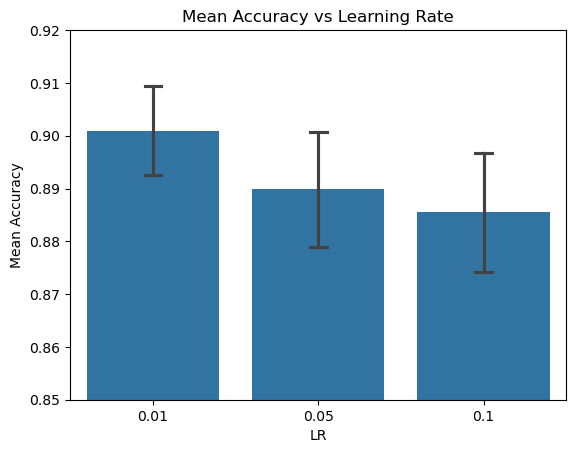

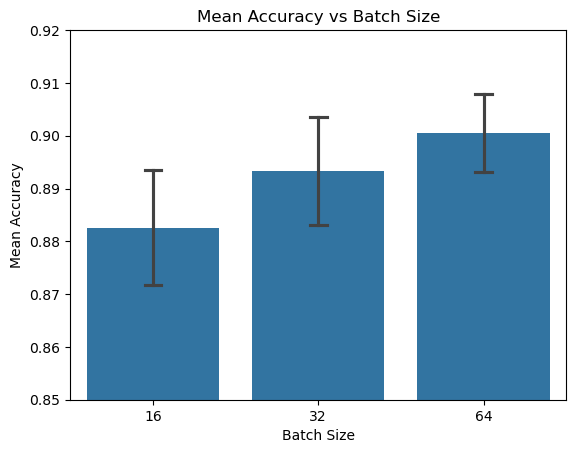

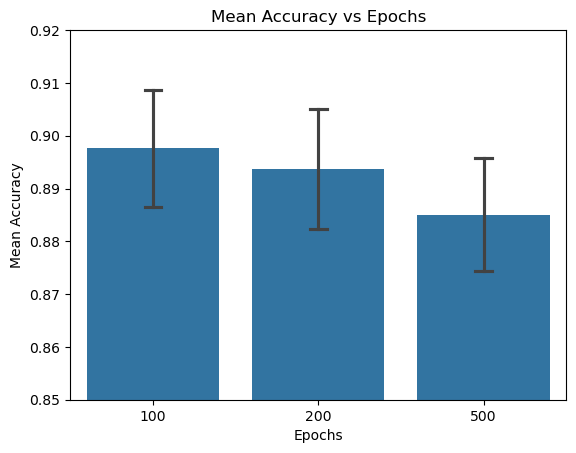

In [23]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# note: we only use scipy for the anova analysis, not for any of the machine
# learning tasks
import seaborn as sns

# to quantitatively analyze which hyperparameters matter most, 
# we run a one way anova test and plot some bar charts to visualize

# ANOVA
print("\nANOVA Results:")
for col in ['LR', 'Batch Size', 'Epochs']:
    groups = [group['Mean Accuracy'].values for name, group in cv_results_df.groupby(col)]
    f_val, p_val = stats.f_oneway(*groups)
    print(f"{col}: F={f_val:.3f}, p={p_val:.4f}")

# plotting some bar plots to see

# Mean Accuracy vs Learning Rate
sns.barplot(data=cv_results_df, x='LR', y='Mean Accuracy', errorbar='sd', capsize=0.1)
plt.title('Mean Accuracy vs Learning Rate')
plt.ylim(0.85, 0.92)
plt.show()

# Mean Accuracy vs Batch Size
sns.barplot(data=cv_results_df, x='Batch Size', y='Mean Accuracy', errorbar='sd', capsize=0.1)
plt.title('Mean Accuracy vs Batch Size')
plt.ylim(0.85, 0.92)
plt.show()

# Mean Accuracy vs Epochs
sns.barplot(data=cv_results_df, x='Epochs', y='Mean Accuracy', errorbar='sd', capsize=0.1)
plt.title('Mean Accuracy vs Epochs')
plt.ylim(0.85, 0.92)
plt.show()

 ### Which hyperparameters mattered most?

To quantitatively determine which of our hyperparameters mattered most, we conducted an ANOVA analysis to determine the statistical effect of the variance of each parameter on mean accuracy. Based on this, it was found that Epochs was most significant (p = 0.0077), and learning rate was the next most significant (p = 0.023). Batch size was not found to be as significant (p = 0.104), but observing the plots above, it is clear that there is still a correlation. 

# Task 3

Similar to task 2, but only sweeping through lamba. 

In [24]:
import pandas as pd
rng = np.random.default_rng(seed=2026)

# Define Hyperparameter Grid - Most of these are now constants
learning_rate = 0.1
batch_size = 16
epochs = 200
K = 5 # Number of folds
lambdas = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

results_list = []

# Create K-fold indices manually
indices = np.arange(len(y_train))
rng.shuffle(indices)
folds = np.array_split(indices, K)

print(f"Starting {K}-fold Cross-Validation...")

for lambda_ in lambdas:
    fold_train_losses = []
    fold_val_losses = []
    fold_train_accuracies = []
    fold_val_accuracies = []
    
    for i in range(K):
        # Split into train/val for this fold
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(K) if j != i])
        
        # to prevent data leakage, the mean and std of each fold should be computed 
        # per fold, so here we copy over the raw training data from before
        x_cv_train_raw = X_train_raw[train_idx]
        y_cv_train = y_train[train_idx]
        
        x_cv_val_raw = X_train_raw[val_idx]
        y_cv_val = y_train[val_idx]
    
        fold_mean = x_cv_train_raw.mean(axis=0)
        fold_std = x_cv_train_raw.std(axis=0)

        # Scale both folds using the TRAIN fold's parameters
        x_cv_train = (x_cv_train_raw - fold_mean) / fold_std
        x_cv_val= (x_cv_val_raw - fold_mean) / fold_std
        
        # Initialize and train model (using different lambdas)
        model = LogisticRegressionSGD(learning_rate=learning_rate, epochs=epochs, batch_size=batch_size, reg_lambda=lambda_)
        model.fit(x_cv_train, y_cv_train)

        # training evaluation 
        x_cv_train_wb = np.column_stack([np.ones(len(x_cv_train)), x_cv_train])
        train_loss = model.compute_cross_entropy_loss(x_cv_train_wb, y_cv_train)
        train_predictions = (model.sigmoid(np.dot(x_cv_train_wb, model.w)) >= 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == y_cv_train)
        
        # same as previous 
        x_cv_val_wb = np.column_stack([np.ones(len(x_cv_val)), x_cv_val])
        val_loss = model.compute_cross_entropy_loss(x_cv_val_wb, y_cv_val)
        val_preds = (model.sigmoid(np.dot(x_cv_val_wb, model.w)) >= 0.5).astype(int)
        val_acc = np.mean(val_preds == y_cv_val)
        
        fold_train_losses.append(train_loss)
        fold_val_losses.append(val_loss)
        fold_train_accuracies.append(train_accuracy)
        fold_val_accuracies.append(val_acc)
    
    # Record average results for this hyperparameter setting (this lambda)
    results_list.append({
        'RegStrength': lambda_,
        'Mean Train Loss': np.mean(fold_train_losses),
        'Mean Train Accuracy': np.mean(fold_train_accuracies),
        'Mean Val Loss': np.mean(fold_val_losses),
        'Mean Val Accuracy': np.mean(fold_val_accuracies)
    })

# Convert to DataFrame for the Deliverable Table
cv_results_df = pd.DataFrame(results_list)
print("Task 3: Results Table")
cv_results_df

Starting 5-fold Cross-Validation...
Task 3: Results Table


,RegStrength,Mean Train Loss,Mean Train Accuracy,Mean Val Loss,Mean Val Accuracy
0,0.000000,0.049101,0.989130,0.504786,0.873913
1,0.000001,0.049153,0.989130,0.504735,0.873913
2,0.000010,0.049623,0.989130,0.504276,0.873913
3,0.000100,0.054169,0.988043,0.499771,0.873913
4,0.001000,0.088406,0.985870,0.463467,0.878261
5,0.010000,0.193296,0.979348,0.400083,0.904348
6,0.100000,0.369504,0.943478,0.449631,0.900000
7,1.000000,0.577954,0.835870,0.585064,0.786957


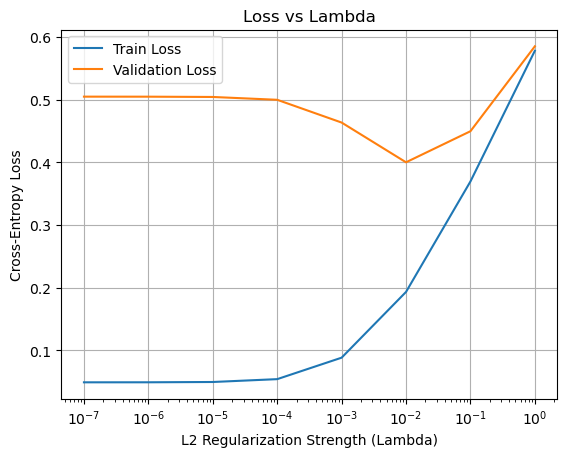

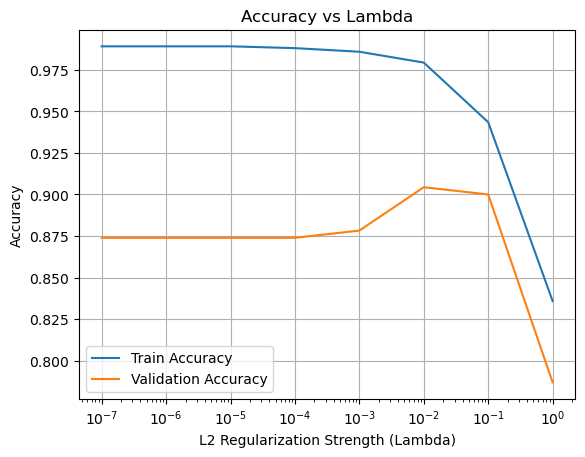

   RegStrength  Mean Train Loss  Mean Val Loss  Mean Val Accuracy
0     0.000000         0.049101       0.504786           0.873913
1     0.000001         0.049153       0.504735           0.873913
2     0.000010         0.049623       0.504276           0.873913
3     0.000100         0.054169       0.499771           0.873913
4     0.001000         0.088406       0.463467           0.878261
5     0.010000         0.193296       0.400083           0.904348
6     0.100000         0.369504       0.449631           0.900000
7     1.000000         0.577954       0.585064           0.786957


In [25]:
plot_lambdas = [1e-7 if l == 0 else l for l in cv_results_df['RegStrength']]
# we are creating log plots, so we don't want to cause numerical log(0) errors

# Plot 1: Cross-Entropy Loss
plt.figure()
plt.plot(plot_lambdas, cv_results_df['Mean Train Loss'], label='Train Loss')
plt.plot(plot_lambdas, cv_results_df['Mean Val Loss'], label='Validation Loss')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (Lambda)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss vs Lambda')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Accuracy
plt.figure()
plt.plot(plot_lambdas, cv_results_df['Mean Train Accuracy'], label='Train Accuracy')
plt.plot(plot_lambdas, cv_results_df['Mean Val Accuracy'], label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (Lambda)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

print(cv_results_df[['RegStrength', 'Mean Train Loss', 'Mean Val Loss', 'Mean Val Accuracy']])

In [26]:
# Choose the best lambda based on minimum Validation Loss
best_row = cv_results_df.loc[cv_results_df['Mean Val Loss'].idxmin()]
best_lambda = best_row['RegStrength']

print(f"Selected best lambda from CV: {best_lambda}")

# Retrain on all training data
final_model = LogisticRegressionSGD(learning_rate=learning_rate, epochs=epochs, 
    batch_size=batch_size, 
    reg_lambda=best_lambda
)
final_model.fit(X_train, y_train)

# Evaluate on Test Set
X_test_wb = np.column_stack([np.ones(len(X_test)), X_test])
test_loss = final_model.compute_cross_entropy_loss(X_test_wb, y_test)

test_preds = final_model.predict(X_test_wb)
test_acc = np.mean(test_preds == y_test)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Selected best lambda from CV: 0.01
Final Test Loss: 0.3900
Final Test Accuracy: 0.9019


Please see our report for comments on task 3.

# Task 4

### **What does the regularization path represent?**

**The regularization path** shows how the coefficients of each feautre changes in different regularization strengths. It represents how our model changes the magnitude of coefficients under different regularization strengths and how it generally responds to a regularization.

Analyzing the regularization path could provide us with some important information about the features of our model. For example, features that change easily are less stable, and features that stay large even under strong regularization are more important. Or those, which shrink easily to 0 (in L1 regularization, for example, are less important)

Plotting the regularization path for different regularization strengths can help us estimate an appropriate regularization strength for our model, which balances the bias and variance of our model to minimize the risk of overfitting or underfitting.

In [32]:
# suppressing warnings for this section:

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(penalty="l1", solver="saga", max_iter=5000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [33]:
C_list = []
non_zero_num = []
Cs = np.logspace(-4, 4, 30)
lr_model = LogisticRegression(penalty="l1", solver="saga", random_state=2026, warm_start=True, max_iter=5000)
for C in Cs:
    count = 0
    lr_model.C = C
    lr_model.fit(X_train, y_train)
    C_list.append(lr_model.coef_[0])
    for coef in lr_model.coef_[0]:
        if abs(coef) > 0:
            count +=1

    non_zero_num.append(count)
C_list = np.array(C_list)
non_zero_num = np.array(non_zero_num)
non_zero_num

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 14, 20, 27, 33, 38, 42, 46,
       47, 49, 51, 50, 52, 56, 57, 57, 57, 57, 57, 57, 57])

In [34]:
C_list

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.91966646, -0.40002665, -0.69660492, ...,  0.01617296,
         1.54918346,  2.17627467],
       [-0.92362457, -0.40113877, -0.70265235, ...,  0.01795352,
         1.55786311,  2.18831247],
       [-0.92676525, -0.40199513, -0.70762476, ...,  0.01950995,
         1.56558725,  2.19874568]], shape=(30, 57))

In [35]:
#finding top-k coefficients by absolute magnitude
k = 5
# indices of top-k abs coefficients
max_m = np.max(np.abs(C_list), axis=0)
indices = np.argsort(max_m)[-k:]

## **The coefficient path plot**

#### **Which features appear most important?**

As we disscussed, the features that remain non-zero even under heavy regularization are the most important ones. Since the model depends on them even if they are heavily penalized.




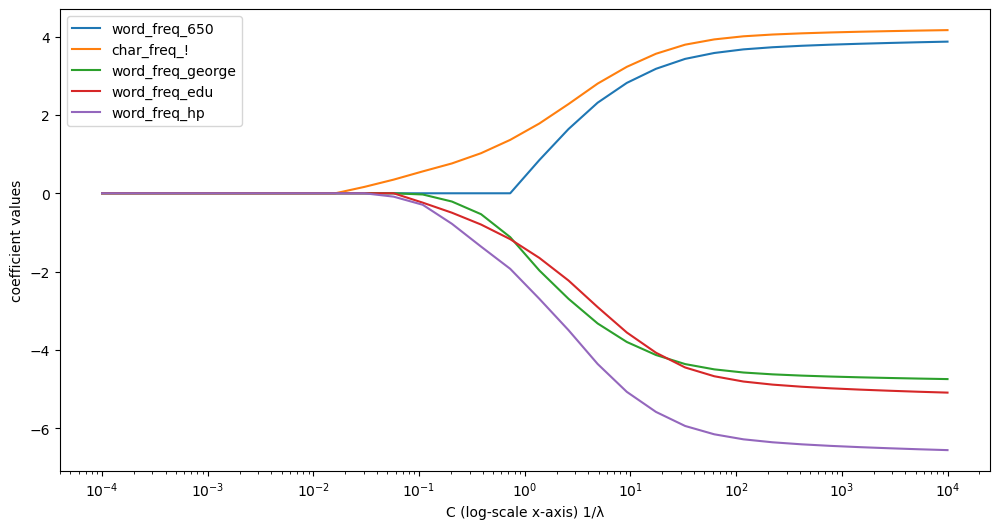

In [36]:
features = spam_df.columns[:-1]
plt.figure(figsize=(12, 6))

for i in indices:
    #plotting Cs as x-axis and y-axis as the coefficient of this feature
    plt.plot(Cs, C_list[:, i], label = features[i])
plt.xscale('log')
plt.xlabel('C (log-scale x-axis) 1/λ')
plt.ylabel('coefficient values')
plt.legend()
plt.show()

## **Sparsity plot**

#### **How sparsity changes as regularization changes?**
**C = 1/λ**
As we can see in the following plot, as the value of the hyperparameter C increases (Corresponding to weaker regularization(smaller λ)), more coefficients of the model become non-zero. Conversely, stronger regulization leads to a larger λ and smaller C, therefore, more coefficients shrinks to 0 as we expected.

This can help us find important features (features that remain non zero even for very small C).




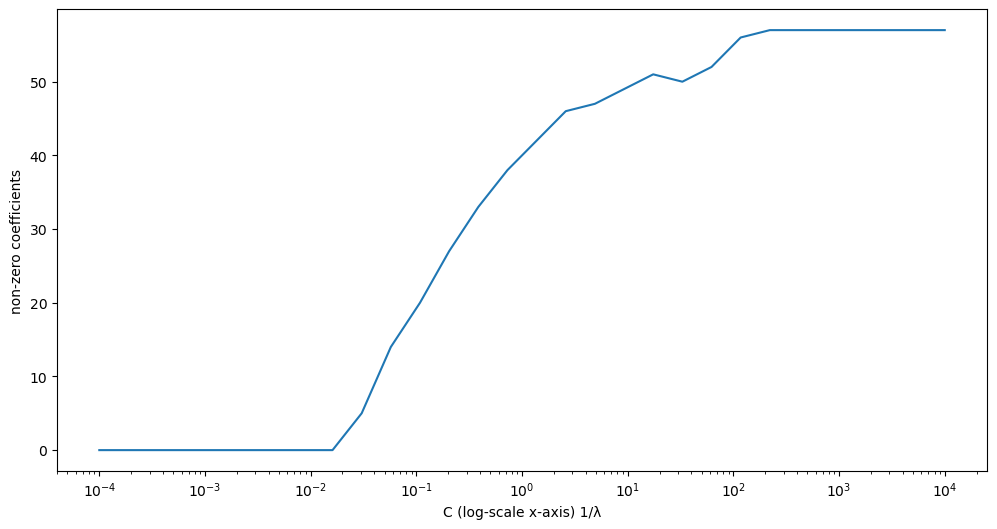

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(Cs, non_zero_num)
plt.xscale('log')
plt.xlabel('C (log-scale x-axis) 1/λ')
plt.ylabel('non-zero coefficients')

plt.show()

# **CV performance vs C**

#### **Trade-off between interpretability (sparsity) and performance**

**Interpretability:** For stronger regulizarization, our model has only a few number of coefficient so it is easier to understand since only a limited number of feature contribute to predictions

**Performance** Logically a model with more non-zero coefficients uses more features and might find more underlyin pattern which will improve the performance of our model (accuracy)

**Stronger regulization(Smaller C) leads to a higher sparsity and model might underfit but better interpretability**

**Weaker regulization leads to a lower sparsity and because of more feature the accuracy increases but the model is complex to interpret and risk over fitting**



As you can see in the plot, for smaller C or stronger regularization, our model lacks accuracy, but as regularization gets weaker the accuracy surges up

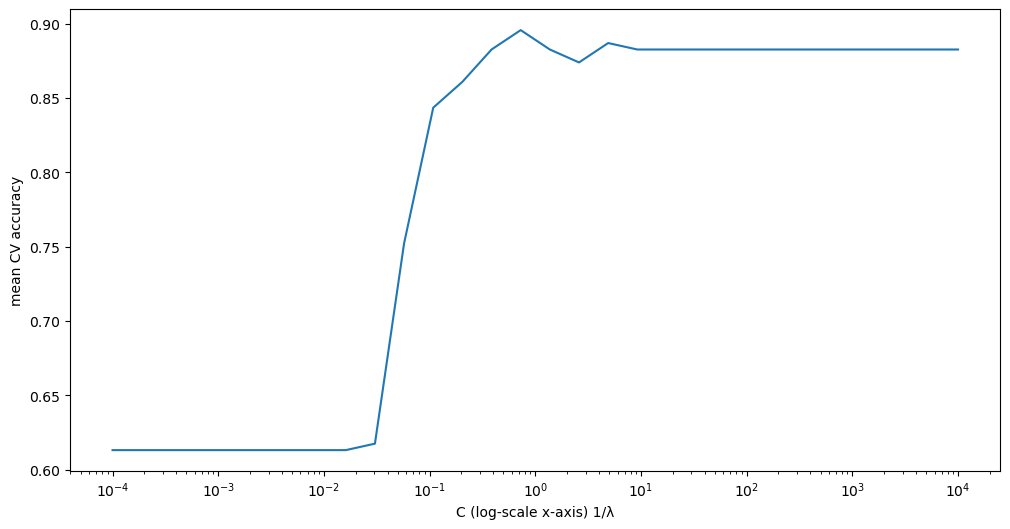

In [38]:
from sklearn.linear_model import LogisticRegressionCV
mean_cv = []
cv = 5 #5 fold cv

lrcv_model = LogisticRegressionCV(Cs = Cs, cv = cv, penalty="l1",solver="saga", random_state=2026, scoring="accuracy", max_iter=5000)
lrcv_model.fit(X_train, y_train)
#cv results stored in a dictionray called scores_ for class 0 and 1
#so scores array is storing the arrays of cvs for class 1
cv_arr= lrcv_model.scores_[1]
mean_cv = np.mean(cv_arr, axis=0)


plt.figure(figsize=(12, 6))
plt.plot(Cs, mean_cv)
plt.xscale('log')
plt.xlabel('C (log-scale x-axis) 1/λ')
plt.ylabel('mean CV accuracy')

plt.show()

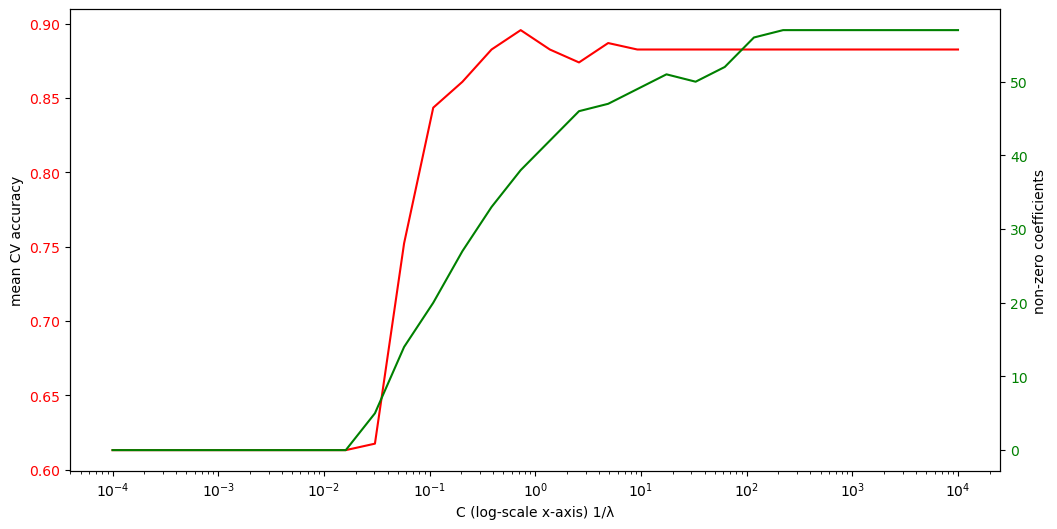

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(Cs, mean_cv, label = "mean CV accuracy", color = 'red')
plt.xscale('log')
plt.xlabel('C (log-scale x-axis) 1/λ')
plt.ylabel('mean CV accuracy')
plt.tick_params(axis='y', labelcolor = 'red')

plt.twinx()
plt.plot(Cs, non_zero_num, label = 'non-zero coefficients', color = 'green')
plt.xscale('log')
plt.xlabel('C (log-scale x-axis) 1/λ')
plt.ylabel('non-zero coefficients')
plt.tick_params(axis='y', labelcolor = 'green')

plt.show()